In [7]:
from typing_extensions import dataclass_transform
file_path = 'adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(file_path, names=column_names, na_values=' ?')
df = pd.DataFrame(data)

print(df)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Select appropriate numerical features for normalization
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Apply Min-Max scaling
scaler_minmax = MinMaxScaler()
data_minmax = data.copy()
data_minmax[numerical_features] = scaler_minmax.fit_transform(data_minmax[numerical_features])


print(data_minmax)


            age          workclass  fnlwgt    education  education-num  \
0      0.301370          State-gov   77516    Bachelors       0.800000   
1      0.452055   Self-emp-not-inc   83311    Bachelors       0.800000   
2      0.287671            Private  215646      HS-grad       0.533333   
3      0.493151            Private  234721         11th       0.400000   
4      0.150685            Private  338409    Bachelors       0.800000   
...         ...                ...     ...          ...            ...   
32556  0.136986            Private  257302   Assoc-acdm       0.733333   
32557  0.315068            Private  154374      HS-grad       0.533333   
32558  0.561644            Private  151910      HS-grad       0.533333   
32559  0.068493            Private  201490      HS-grad       0.533333   
32560  0.479452       Self-emp-inc  287927      HS-grad       0.533333   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm

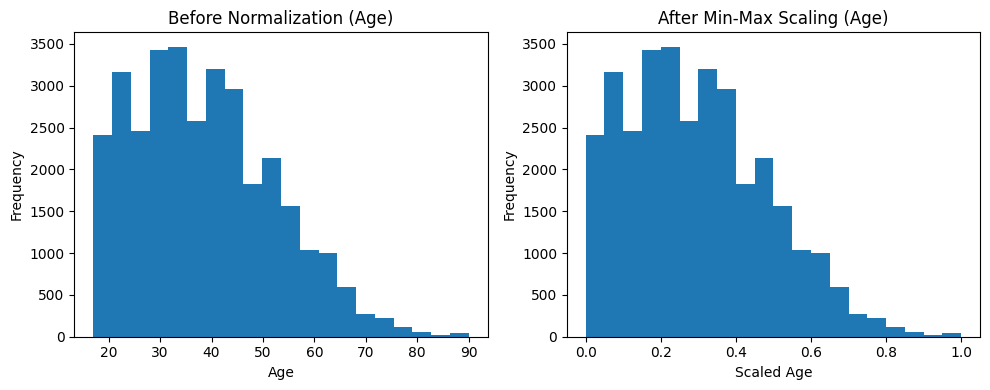

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(data['age'], bins=20)
plt.title('Before Normalization (Age)')
plt.xlabel('Age')
plt.ylabel('Frequency')

# After Min-Max scaling
plt.subplot(1, 2, 2)
plt.hist(data_minmax['age'], bins=20)
plt.title('After Min-Max Scaling (Age)')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

In [13]:
outliers = {}
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[feature] = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

for feature, outlier_data in outliers.items():
    print(f"Outliers in '{feature}': {len(outlier_data)}")

capping_bounds = {
    'age': [18, 80],
    'education-num': [0, 20],  #
}

# Apply capping to the dataset
for feature, bounds in capping_bounds.items():
    data[feature] = data[feature].apply(lambda x: bounds[1] if x > bounds[1] else bounds[0] if x < bounds[0] else x)



Outliers in 'age': 143
Outliers in 'education-num': 1198
Outliers in 'capital-gain': 2712
Outliers in 'capital-loss': 1519
Outliers in 'hours-per-week': 9008
